## ELEC 3105
## Tutorial - Magnetic Circuits
## Question 11

In [1]:
from IPython.display import display_html
display_html("""<button onclick="$('.input, .prompt, .output_stderr, .output_error').toggle();
">Click here to toggle on/off the raw code</button>""", raw=True)

Click here to toggle on/off the raw code

In [2]:
%pylab inline
%precision %.4g
import cmath
from scipy import constants as c   # Enables constants in the Notebook

Populating the interactive namespace from numpy and matplotlib


A core with three limps is shown in the following figure:

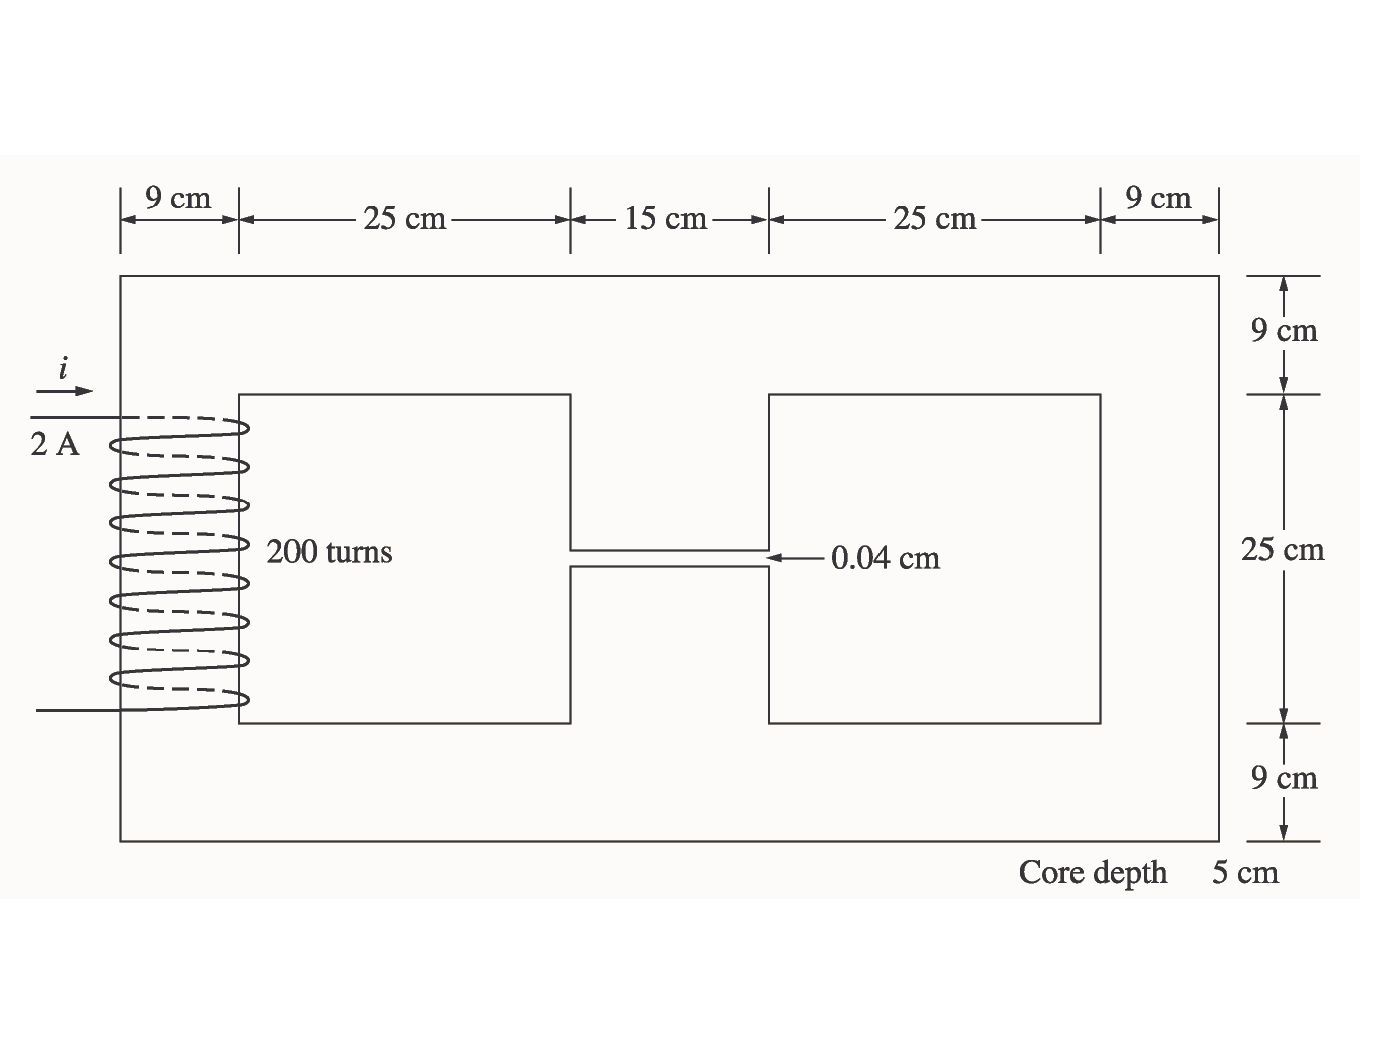

In [18]:
from IPython.display import Image
Image(filename="Figures\TMC_Q11_Fig1.png",width=500,height=500)

The depth of the core is 5cm and the number of turns in the coil is 200. The relative permeability of the core is 1500. Alsu assume that the effective area of the air-gap increases 4% due to fringing.

* What is the flux in each limp of the core?
* What is the flux density in each of the limps?

### Answer

There are four different areas in this circuit that we need to calculate the reluctance:
* The left side of the core, $R_l$
* The middle limp, $R_m$
* The air-gap, and $R_{ag}$
* The right side of the core, $R_r$. 

The total reluctance of the core will be $$R_{total} = R_l + \dfrac{(R_m + R_{ag})R_r}{R_m + R_{ag}+R_r}$$

In [4]:
ll = 1.08 #[m]
lm = 0.34 # [m]
lag = 0.0004 #[m]
lr = 1.08 #[m]
mu_r = 1500
d = 0.05 # [m] depth of the core
wl = 0.09 #[m]
wr = 0.09 #[m]
wm = 0.15 #[m]
ffring = 1.04
N = 200 # [turns]
I = 2 #[A]

In [5]:
Rl = ll/(mu_r * c.mu_0 * wl * d)
Rr = lr/(mu_r * c.mu_0 * wr * d)
Rm = lm/(mu_r * c.mu_0 * wm * d)
Rag = lag/(c.mu_0 * wm * d * ffring)
print('Rl = {:.2f} AT/Wb'.format(Rl))
print('Rr = {:.2f} AT/Wb'.format(Rr))
print('Rm = {:.2f} AT/Wb'.format(Rm))
print('Rag = {:.2f} AT/Wb'.format(Rag))

Rl = 127323.95 AT/Wb
Rr = 127323.95 AT/Wb
Rm = 24050.08 AT/Wb
Rag = 40808.96 AT/Wb


In [6]:
Rtotal = Rl + ((Rm+Rag)*Rr)/(Rm + Rag + Rr)
print('Rag = {:.2f} AT/Wb'.format(Rag))

Rag = 40808.96 AT/Wb


The MMF generated by the coil is $ MMF = N \cdot I$

In [7]:
MMF = N * I
print('MMF = {:.2f} AT'.format(MMF))

MMF = 400.00 AT


The total flux of the core is equal to the flux of the left side of the core and will be equal to $\phi = \dfrac{MMF}{R_{total}}$

In [8]:
flux_total = flux_left = MMF / Rtotal
print('φtotal = {:.6f} Wb'.format(flux_total))

φtotal = 0.002349 Wb


In [9]:
flux_middle = (Rr)/(Rm + Rag + Rr) * flux_total
print('φmiddle = {:.6f} Wb'.format(flux_middle))

φmiddle = 0.001556 Wb


In [10]:
flux_right = (Rm + Rag)/(Rm + Rag + Rr) * flux_total
print('φright = {:.6f} Wb'.format(flux_right))

φright = 0.000793 Wb


The flux density in each of the limbs of the core can be calculated using $B = \dfrac{\phi}{A}$

In [13]:
Bleft = flux_left / (wl * d)
print('Bleft = {:.4f} T'.format(Bleft))

Bleft = 0.5220 Wb


In [17]:
Bmiddle = flux_middle / (wm * d)
print('Bleft = {:.4f} T'.format(Bmiddle))

Bleft = 0.2075 Wb


In [16]:
Bright = flux_right / (wr * d)
print('Bleft = {:.4f} T'.format(Bright))

Bleft = 0.1762 Wb
